In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2023-06-11 21:49:13.746920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
2.11.0
2.11.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

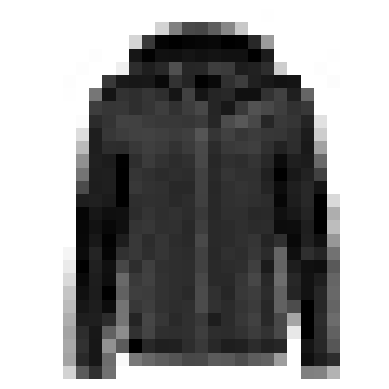

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Będziemy używać klas numerycznych i nazw.

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

Możemy narysować więcej przykładów treningowych.

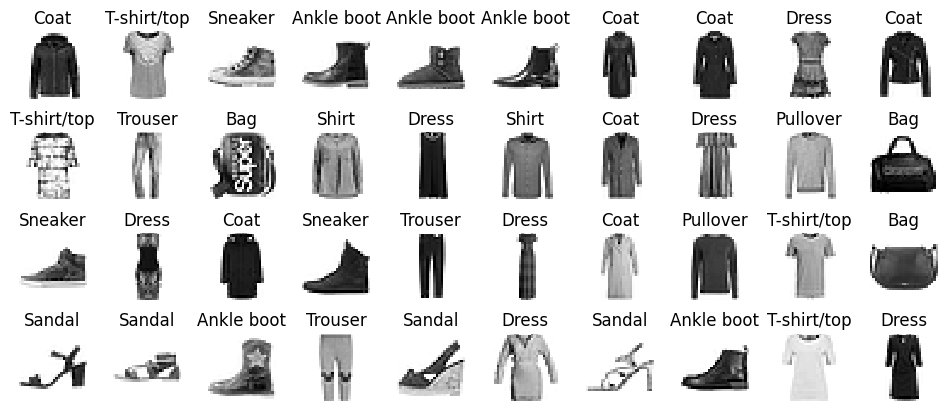

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


history_sgd = History()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

sgd = keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [27]:

model.fit(X_train, y_train, epochs=30,  validation_data=(X_valid, y_valid),callbacks=[history_sgd])

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5084 - accuracy: 0.8188 - val_loss: 0.3780 - val_accuracy: 0.8650
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3765 - accuracy: 0.8628 - val_loss: 0.3570 - val_accuracy: 0.8698
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3415 - accuracy: 0.8732 - val_loss: 0.3374 - val_accuracy: 0.8754
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3170 - accuracy: 0.8827 - val_loss: 0.3232 - val_accuracy: 0.8816
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2997 - accuracy: 0.8879 - val_loss: 0.3293 - val_accuracy: 0.8798
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2827 - accuracy: 0.8945 - val_loss: 0.3158 - val_accuracy: 0.8870
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2708 - accuracy: 0.8992 - val_loss: 0.3041 - val_accuracy:

In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


history_Adam = History()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam,
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, epochs=30,  validation_data=(X_valid, y_valid),callbacks=[history_Adam])

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4819 - accuracy: 0.8261 - val_loss: 0.3591 - val_accuracy: 0.8698
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.8666 - val_loss: 0.4071 - val_accuracy: 0.8558
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3281 - accuracy: 0.8777 - val_loss: 0.3172 - val_accuracy: 0.8840
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3008 - accuracy: 0.8885 - val_loss: 0.3044 - val_accuracy: 0.8918
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.8938 - val_loss: 0.2998 - val_accuracy: 0.8892
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2689 - accuracy: 0.8998 - val_loss: 0.3227 - val_accuracy: 0.8848
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9042 - val_loss: 0.3298 - val_accuracy:

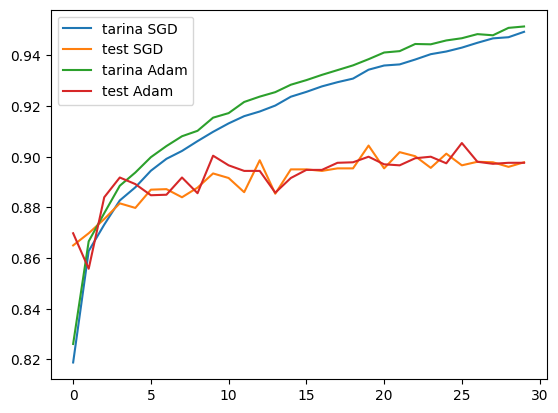

In [30]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_Adam.history['accuracy'], label = "tarina Adam")
plt.plot(history_Adam.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()